In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
basics = pd.read_csv("title_basics_data.tsv", delimiter = "\t", low_memory = False)
df = basics[['tconst', 'startYear', 'titleType']]
df

,tconst,startYear,titleType
0,tt0000001,1894,short
1,tt0000002,1892,short
2,tt0000003,1892,short
3,tt0000004,1892,short
4,tt0000005,1893,short
...,...,...,...
7478103,tt9916848,2010,tvEpisode
7478104,tt9916850,2010,tvEpisode
7478105,tt9916852,2010,tvEpisode
7478106,tt9916856,2015,short


In [43]:
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

df1 = df[(df['startYear'] >= 1900) & (df['titleType'] == 'movie')]
df1.head(10)

# df1 = df[df['titleType'] == 'movie']


<ipython-input-43-f3c3cda4196a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')


,tconst,startYear,titleType
331,tt0000335,1900.0,movie
498,tt0000502,1905.0,movie
570,tt0000574,1906.0,movie
610,tt0000615,1907.0,movie
625,tt0000630,1908.0,movie
668,tt0000675,1908.0,movie
669,tt0000676,1908.0,movie
672,tt0000679,1908.0,movie
729,tt0000739,1908.0,movie
783,tt0000793,1909.0,movie


In [45]:
# print(df1)
movies_count_year = df1.groupby('startYear').count().reset_index()


In [46]:
df2 = movies_count_year.drop('titleType', axis = 1)
df2

,startYear,tconst
0,1900.0,14
1,1901.0,8
2,1902.0,6
3,1903.0,13
4,1904.0,7
...,...,...
124,2024.0,17
125,2025.0,4
126,2026.0,3
127,2027.0,4


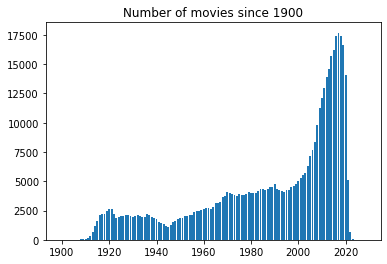

In [47]:
plt.bar(df2['startYear'],df2['tconst'])
plt.title('Number of movies since 1900')
plt.show()